# Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")

In [2]:
songs = pd.read_csv('data/songs.csv')

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 0 to 13326
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            13327 non-null  object 
 1   album             13327 non-null  object 
 2   release_date      13327 non-null  object 
 3   track_name        13327 non-null  object 
 4   track_id          13327 non-null  object 
 5   popularity        13327 non-null  int64  
 6   danceability      13327 non-null  float64
 7   energy            13327 non-null  float64
 8   key               13327 non-null  int64  
 9   loudness          13327 non-null  float64
 10  mode              13327 non-null  int64  
 11  speechiness       13327 non-null  float64
 12  instrumentalness  13327 non-null  float64
 13  liveness          13327 non-null  float64
 14  valence           13327 non-null  float64
 15  tempo             13327 non-null  float64
 16  duration_ms       13327 non-null  int64 

In [4]:
songs.shape

(13327, 19)

In [5]:
songs.duplicated().sum()

315

In [6]:
songs = songs.drop(columns = 'track_id')

In [7]:
songs.duplicated().sum()

317

In [8]:
songs.drop_duplicates(inplace=True)

In [9]:
songs.duplicated().sum()

0

In [10]:
# Drop duplicate tracks from the merged playlists and fill NaN values in the hit column in order to binarize the column
# songs.drop_duplicates(subset=['track_name','artist'], inplace=True)
songs['hit'] = songs['hit'].fillna(int(0))
songs['hit'] = songs['hit'].astype(int)

In [11]:
# Create new duration column that shows track length in minutes
songs['duration'] = (songs['duration_ms']/60000).round(2)
songs.drop(columns='duration_ms', inplace=True)

In [12]:
# Create new features that portray the date and month a track was released 
songs['release_date'] = pd.to_datetime(songs['release_date'])
songs['release_day'] = songs['release_date'].apply(lambda x: x.day)
songs['release_month'] = songs['release_date'].apply(lambda x: x.month)
songs['release_year'] = songs['release_date'].apply(lambda x: x.year)

In [13]:
# Drop songs released in 2021
songs = songs.loc[songs['release_year'] != 2021]
songs.shape

(12701, 21)

In [14]:
songs['hit'].value_counts()

0    11693
1     1008
Name: hit, dtype: int64

In [15]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12701 entries, 0 to 13326
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist            12701 non-null  object        
 1   album             12701 non-null  object        
 2   release_date      12701 non-null  datetime64[ns]
 3   track_name        12701 non-null  object        
 4   popularity        12701 non-null  int64         
 5   danceability      12701 non-null  float64       
 6   energy            12701 non-null  float64       
 7   key               12701 non-null  int64         
 8   loudness          12701 non-null  float64       
 9   mode              12701 non-null  int64         
 10  speechiness       12701 non-null  float64       
 11  instrumentalness  12701 non-null  float64       
 12  liveness          12701 non-null  float64       
 13  valence           12701 non-null  float64       
 14  tempo             1270

In [16]:
songs.columns[5:20]

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'hit', 'duration', 'release_day', 'release_month'],
      dtype='object')

In [17]:
# Create separate dataframe for songs that were hits

hits = songs[songs['hit']==1]

In [18]:
hits['release_year'].value_counts()

2017    109
2018     99
2019     96
2015     92
2014     92
2010     91
2012     90
2011     89
2016     78
2013     77
2020     47
2009     42
2008      4
2005      1
1994      1
Name: release_year, dtype: int64

In [19]:
# dropped Mariah Carey's All I Want For Christmas is You (1994) - outlier
hits = hits.loc[hits['release_year'] >= 2010]
hits.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,960.0,62.006250,25.087417,0.0000,61.000000,71.0000,78.000000,90.000
danceability,960.0,0.674900,0.128606,0.2130,0.590000,0.6805,0.762250,0.970
energy,960.0,0.671841,0.158711,0.0565,0.567000,0.6825,0.798000,0.972
key,960.0,5.428125,3.650966,0.0000,2.000000,6.0000,9.000000,11.000
loudness,960.0,-5.756107,1.997241,-18.0710,-6.710250,-5.4735,-4.386250,-1.190
mode,960.0,0.617708,0.486201,0.0000,0.000000,1.0000,1.000000,1.000
speechiness,960.0,0.103479,0.098710,0.0232,0.040875,0.0600,0.123000,0.592
instrumentalness,960.0,0.004637,0.042246,0.0000,0.000000,0.0000,0.000007,0.715
liveness,960.0,0.170911,0.123530,0.0210,0.093600,0.1230,0.210000,0.824
valence,960.0,0.506107,0.212899,0.0376,0.348750,0.5000,0.661250,0.969


In [20]:
# Create separate dataframe for songs that were non hits
nonhits = songs[songs['hit']==0]
nonhits.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,11693.0,32.507227,27.224524,0.0000,0.0000,36.000000,57.0000,95.000
danceability,11693.0,0.591316,0.165360,0.0000,0.4820,0.601000,0.7110,0.980
energy,11693.0,0.681188,0.232698,0.0021,0.5530,0.733000,0.8640,0.999
key,11693.0,5.321645,3.601959,0.0000,2.0000,5.000000,9.0000,11.000
loudness,11693.0,-7.481846,4.806999,-43.7380,-8.7510,-6.181000,-4.6050,0.654
mode,11693.0,0.617634,0.485986,0.0000,0.0000,1.000000,1.0000,1.000
speechiness,11693.0,0.082306,0.082729,0.0000,0.0367,0.050700,0.0874,0.940
instrumentalness,11693.0,0.139239,0.287466,0.0000,0.0000,0.000148,0.0452,0.992
liveness,11693.0,0.188957,0.155514,0.0120,0.0928,0.124000,0.2450,0.984
valence,11693.0,0.491374,0.245366,0.0000,0.3000,0.484000,0.6840,0.990


### Release Date Analysis for Hit Songs

Based on the plots below, there is a common trend for the release date on hit songs. Majority of hit songs are released on the first of the month. January had the highest count of hits.

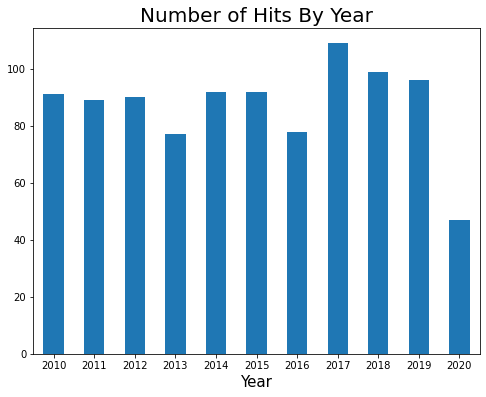

In [21]:
plt.figure(figsize=(8,6))
hits.groupby('release_year')['hit'].sum().plot(kind='bar')
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=0)
plt.title('Number of Hits By Year', fontsize=20);

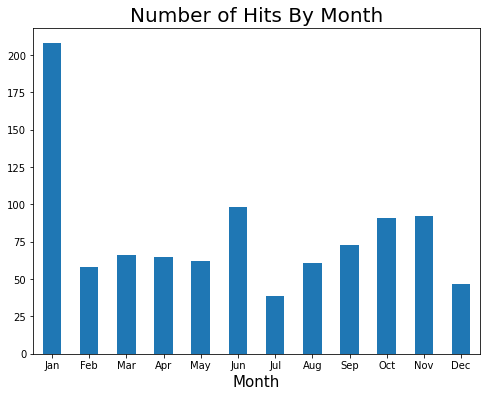

In [22]:
plt.figure(figsize=(8,6))
hits.groupby('release_month')['hit'].sum().plot(kind='bar')
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xlabel('Month', fontsize=15)
plt.xticks(ticks = np.arange(len(months)),labels=months, rotation=0)
plt.title('Number of Hits By Month', fontsize=20);

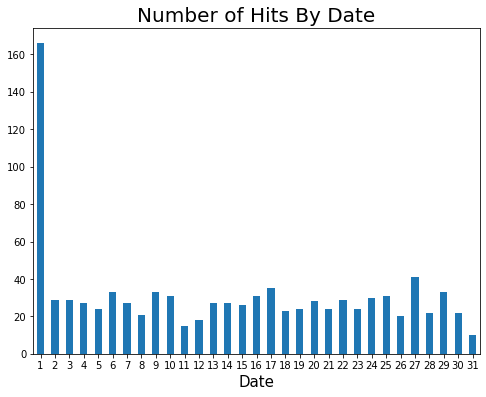

In [23]:
plt.figure(figsize=(8,6))
hits.groupby('release_day')['hit'].sum().plot(kind='bar')
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=0)
plt.title('Number of Hits By Date', fontsize=20);

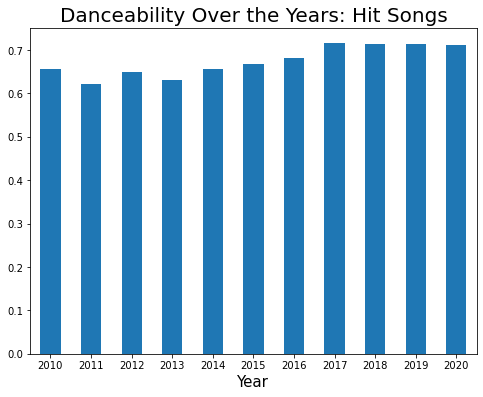

In [24]:
plt.figure(figsize=(8,6))
hits.groupby('release_year')['danceability'].mean().plot(kind='bar')
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=0)
plt.title('Danceability Over the Years: Hit Songs', fontsize=20);

In [25]:
hits.columns[5:20]

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'hit', 'duration', 'release_day', 'release_month'],
      dtype='object')

### Audio Feature Analysis

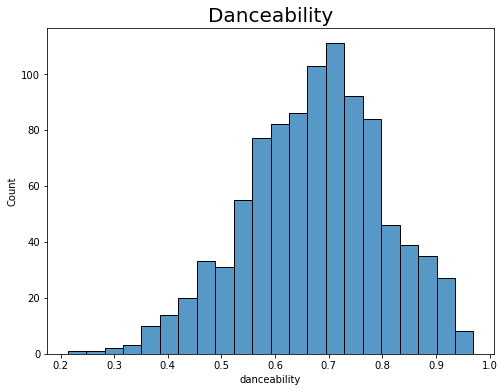

In [26]:
# Danceability
plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='danceability')
plt.title('Danceability', fontsize=20)
plt.show()

Danceability portrays how fit a track is for dancing. This metric is based on a combination of musical elements. A value of 0.0 is least danceable and 1.0 is most danceable.

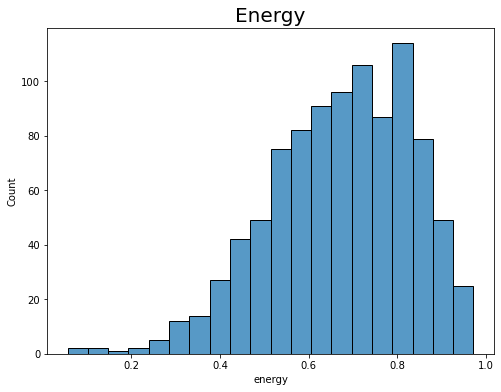

In [27]:
# Energy
plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='energy')
plt.title('Energy', fontsize=20)
plt.show()

Energy is measured from 0.0 to 1.0. Energy measures how fast, loud, and noisy a track is.

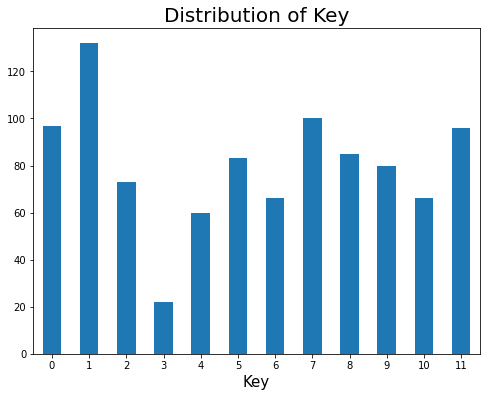

In [28]:
# Key
plt.figure(figsize=(8,6))
hits.groupby('key')['hit'].count().plot(kind='bar')
plt.xlabel('Key', fontsize=15)
plt.xticks(rotation=0)
plt.title('Distribution of Key', fontsize=20);

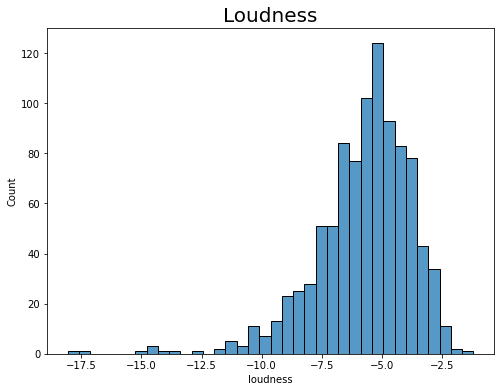

In [29]:
# loudness
plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='loudness')
plt.title('Loudness', fontsize=20)
plt.show()

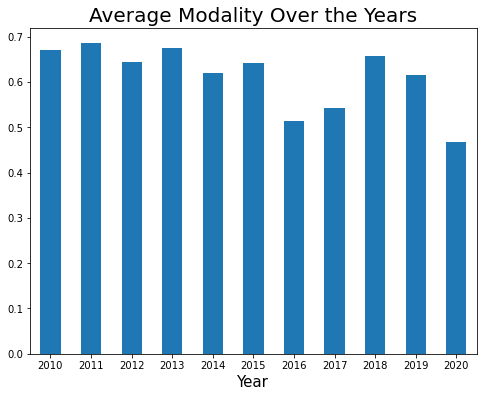

In [30]:
# Mode
plt.figure(figsize=(8,6))
hits.groupby('release_year')['mode'].mean().plot(kind='bar')
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=0)
plt.title('Average Modality Over the Years', fontsize=20);

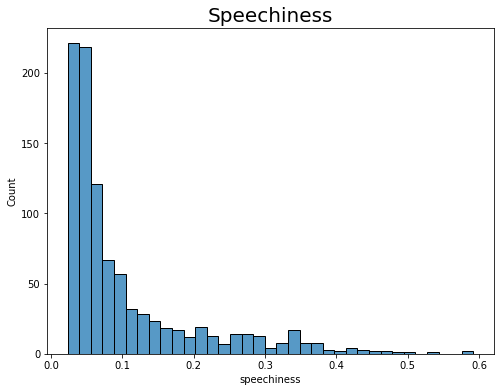

In [31]:
# Speechiness
plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='speechiness')
plt.title('Speechiness', fontsize=20)
plt.show()

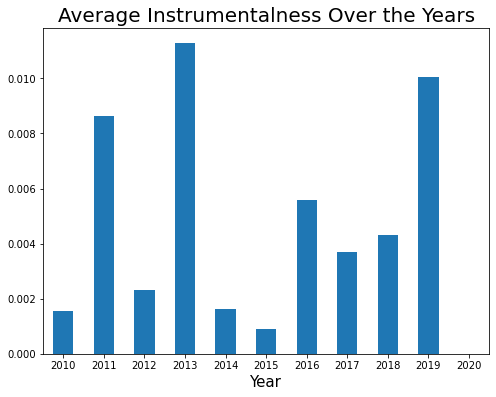

In [32]:
# Instrumentalness
plt.figure(figsize=(8,6))
hits.groupby('release_year')['instrumentalness'].mean().plot(kind='bar')
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=0)
plt.title('Average Instrumentalness Over the Years', fontsize=20);

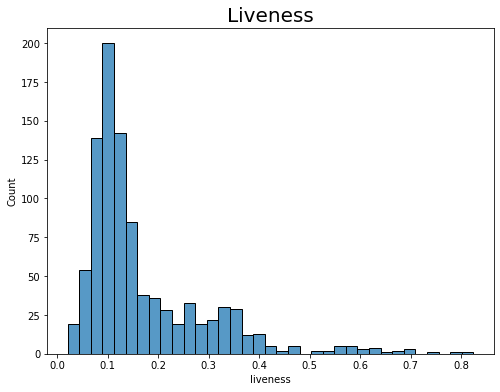

In [33]:
# Liveness

plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='liveness')
plt.title('Liveness', fontsize=20)
plt.show()

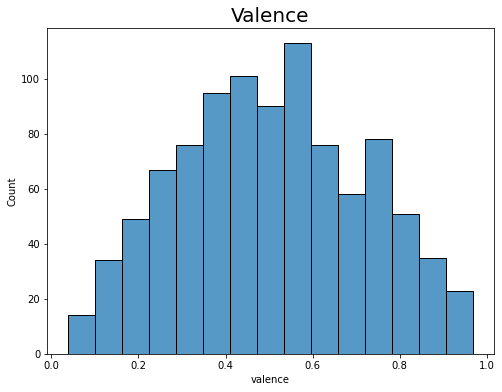

In [34]:
# Valence

plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='valence')
plt.title('Valence', fontsize=20)
plt.show()

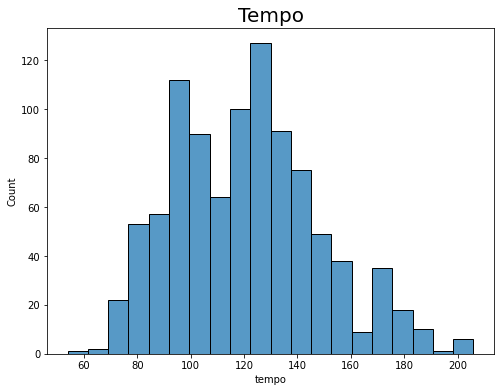

In [35]:
# Tempo

plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='tempo')
plt.title('Tempo', fontsize=20)
plt.show()

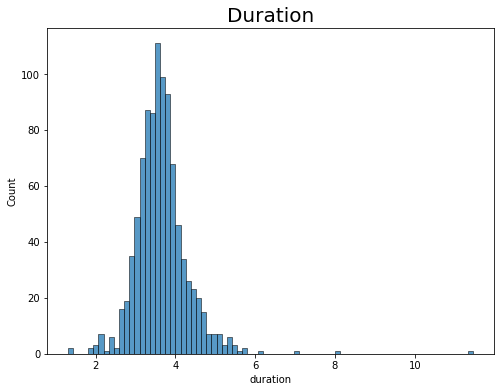

In [36]:
# Duration

plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='duration')
plt.title('Duration', fontsize=20)
plt.show()

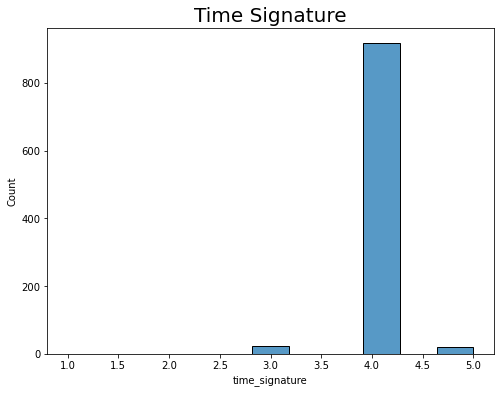

In [37]:
# Duration

plt.figure(figsize=(8,6))
sns.histplot(data=hits, x='time_signature')
plt.title('Time Signature', fontsize=20)
plt.show()

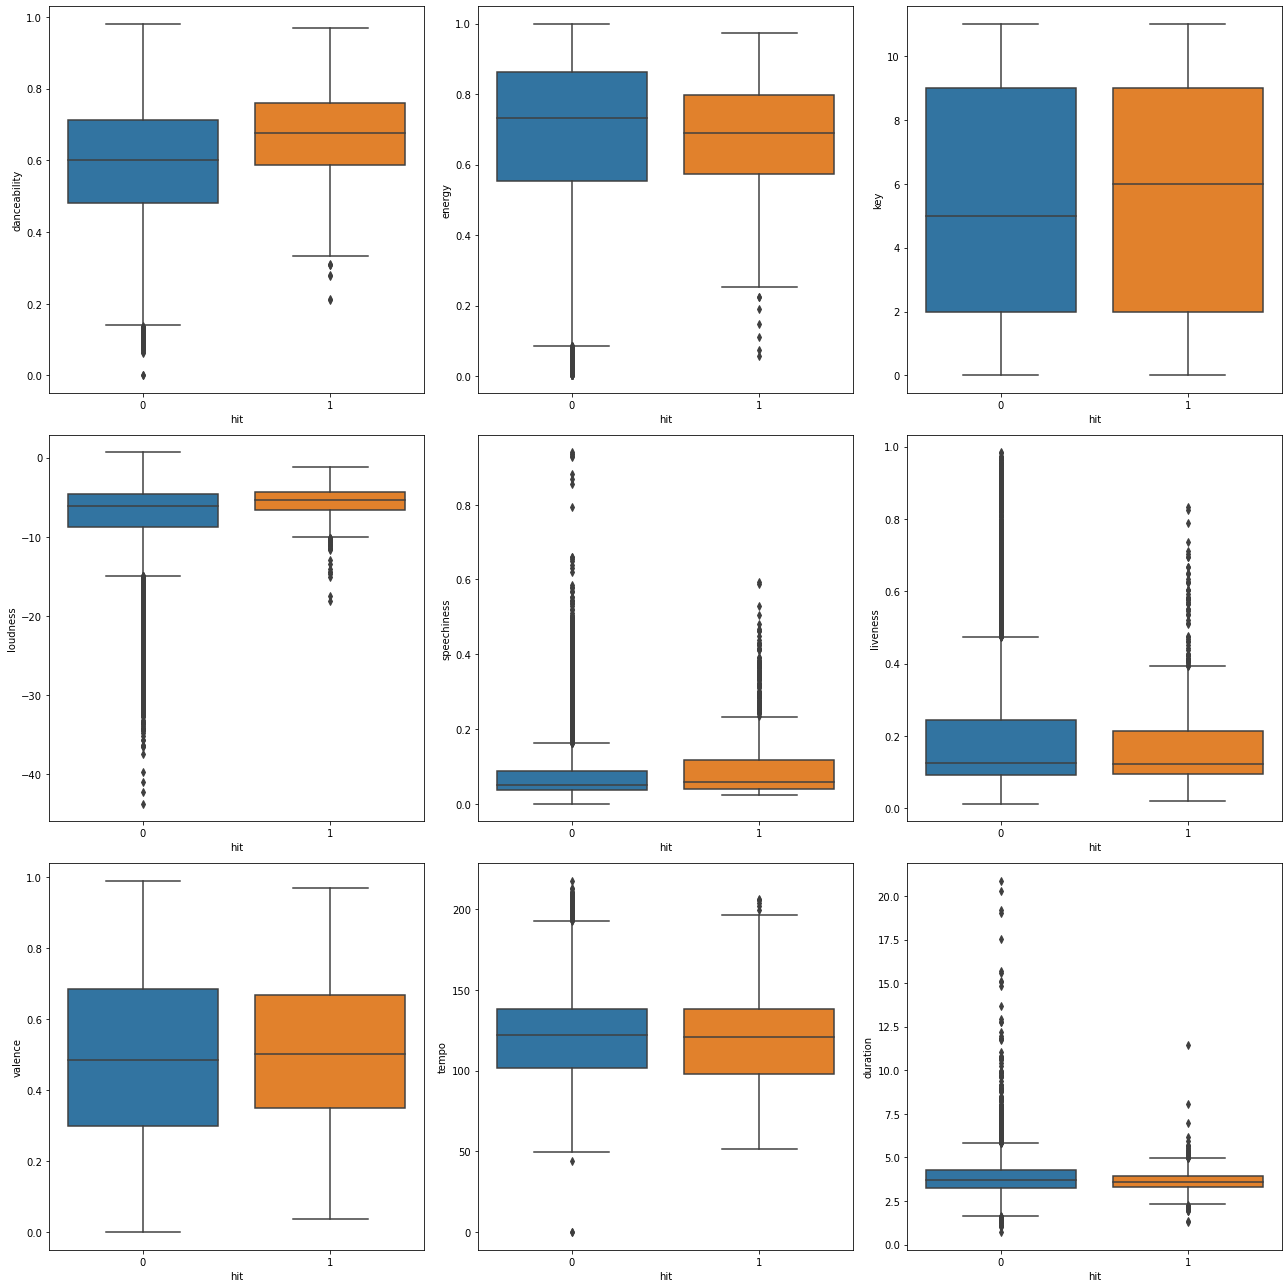

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], data=songs, x='hit', y='danceability')
sns.boxplot(ax=axes[0, 1], data=songs, x='hit', y='energy')
sns.boxplot(ax=axes[0, 2], data=songs, x='hit', y='key')
sns.boxplot(ax=axes[1, 0], data=songs, x='hit', y='loudness')
# sns.boxplot(ax=axes[1, 0], data=songs, x='hit', y='mode')
sns.boxplot(ax=axes[1, 1], data=songs, x='hit', y='speechiness')
sns.boxplot(ax=axes[1, 2], data=songs, x='hit', y='liveness')
sns.boxplot(ax=axes[2, 0], data=songs, x='hit', y='valence')
sns.boxplot(ax=axes[2, 1], data=songs, x='hit', y='tempo')
sns.boxplot(ax=axes[2, 2], data=songs, x='hit', y='duration')
plt.tight_layout();
# sns.boxplot(ax=axes[2, 2], data=songs, x='hit', y='time_signature')
plt.savefig('./images/boxplots.png');

<AxesSubplot:>

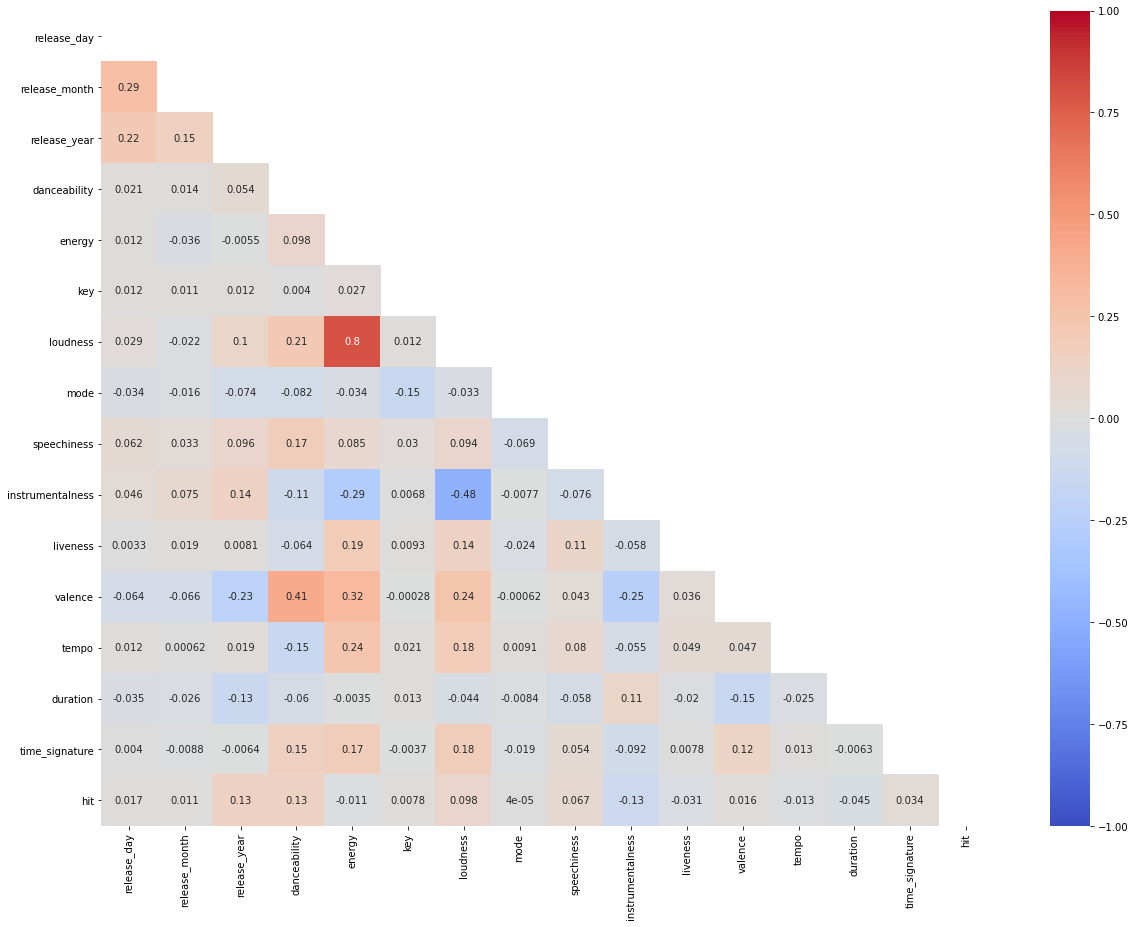

In [43]:
# Correlation of audio features to hits
audio_features=['release_day','release_month','release_year','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration','time_signature','hit']
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
#plt.title('Correlation of Audio Features to Hits', fontsize=20)
corr = songs[audio_features].corr()
sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, annot=True, cmap ='coolwarm');

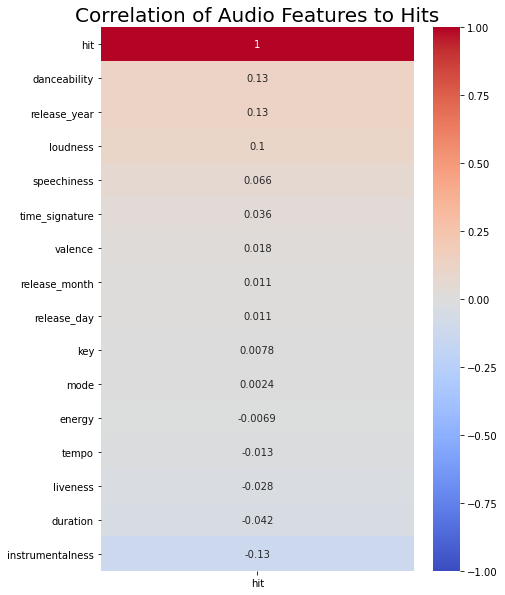

In [40]:
# Correlation of audio features to hits
audio_features=['release_day','release_month','release_year','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration','time_signature','hit']

plt.figure(figsize=(7,10))
plt.title('Correlation of Audio Features to Hits', fontsize=20)
corr = songs[audio_features].corr()
sns.heatmap(corr[['hit']].sort_values(by='hit', ascending=False), vmin=-1, vmax=1, annot=True, cmap ='coolwarm')
plt.savefig('./images/correlation.png');

From the correlation table above, there are a few insights to be taken away:

The strongest features that correlate to a hit are danceability, the release year, and the loudness. As the instrumentalness decreases, the chances of a song becoming a hit decreases as well.

In [41]:
songs = pd.concat([hits,nonhits], ignore_index = True)

In [42]:
songs.to_csv('data/songs_clean.csv', index=False)